In [6]:
pip install pandas


In [7]:
import numpy as np


In [8]:

import pandas as pd


In [12]:
np.random.seed(42)  #provides random number


In [52]:
apartments=[f"Apt_{i}"for i in range(1,21)]


In [62]:
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")


In [64]:

data={
    "Date":np.tile(dates,len(apartments)),
    "Apartment":np.repeat(apartments,len(dates)),
    "Electricity_usage":np.random.normal(loc=70,scale=5,size=len(dates)*len(apartments))
}


In [66]:

df=pd.DataFrame(data)

In [68]:
df["Electricity_usage"]=df["Electricity_usage"].round(2)

In [70]:
print(df.isnull().sum())

Date                 0
Apartment            0
Electricity_usage    0
dtype: int64


In [72]:
print(df.describe())

                      Date  Electricity_usage
count                  600         600.000000
mean   2025-07-15 12:00:00          70.451550
min    2025-07-01 00:00:00          55.520000
25%    2025-07-08 00:00:00          67.187500
50%    2025-07-15 12:00:00          70.530000
75%    2025-07-23 00:00:00          73.632500
max    2025-07-30 00:00:00          83.160000
std                    NaN           5.012139


In [74]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [76]:
#Total usage per apartments

In [78]:
usage_per_apartment=df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)
print(usage_per_apartment)


Apartment
Apt_10    2162.58
Apt_18    2161.94
Apt_1     2149.73
Apt_15    2138.42
Apt_14    2135.35
Apt_11    2133.26
Apt_9     2131.90
Apt_6     2128.77
Apt_8     2122.74
Apt_17    2121.55
Apt_19    2112.43
Apt_7     2103.80
Apt_12    2095.18
Apt_4     2094.34
Apt_13    2093.52
Apt_16    2081.55
Apt_3     2080.50
Apt_2     2079.73
Apt_20    2074.35
Apt_5     2069.29
Name: Electricity_usage, dtype: float64


In [80]:
daily_avg=df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head())

Date
2025-07-01    69.4400
2025-07-02    69.5960
2025-07-03    69.0245
2025-07-04    71.8510
2025-07-05    70.1375
Name: Electricity_usage, dtype: float64


In [82]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


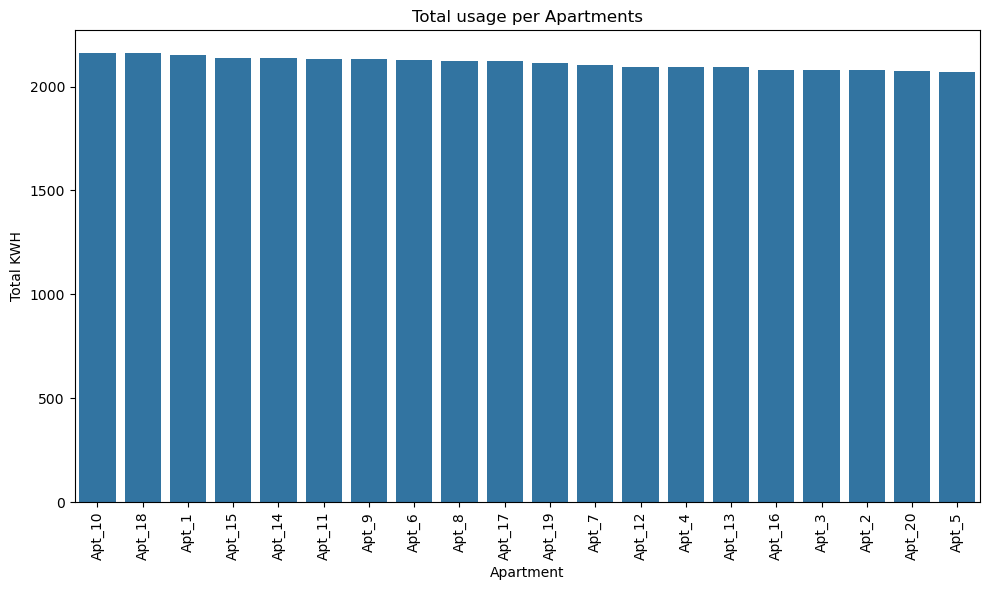

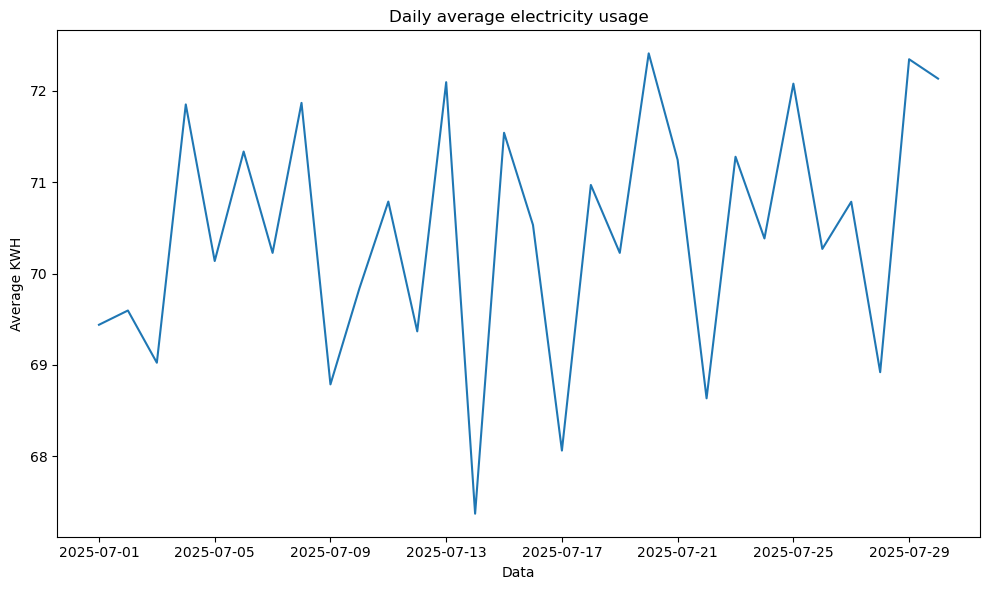

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure (figsize=(10,6))
sns.barplot(x=usage_per_apartment.index, y=usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Apartment")
plt.ylabel("Total KWH")
plt.tight_layout()
plt.show()
#time series plot of daily average
plt.figure(figsize=(10,6))
sns.lineplot(x=daily_avg.index,y=daily_avg.values)
plt.title("Daily average electricity usage")
plt.xlabel("Data")
plt.ylabel("Average KWH")
plt.tight_layout()
plt.show()

In [84]:
threshold= df["Electricity_usage"].mean()+2 *df["Electricity_usage"].std()
df["High_Usage_flag"]=df["Electricity_usage"]>threshold
print(df[df["High_Usage_flag"]==True].head())

          Date Apartment  Electricity_usage  High_Usage_flag
14  2025-07-15     Apt_1              82.23             True
54  2025-07-25     Apt_2              82.87             True
155 2025-07-06     Apt_6              83.16             True
162 2025-07-13     Apt_6              82.80             True
222 2025-07-13     Apt_8              81.49             True
